In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sqlalchemy import create_engine
import re

# Path to your SQLite database file
db_path = 'wages_and_employment_data.db'

# Create an engine for SQLite
engine = create_engine(f'sqlite:///{db_path}')

# Query the database
query = "SELECT * FROM wages_and_employment_ratio_by_education"
data = pd.read_sql_query(query, con=engine)

# Display the DataFrame
data



In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 43 to 0
Data columns (total 69 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   year                                                44 non-null     int64  
 1   total_population                                    44 non-null     int64  
 2   White_Men_Less_Than_High_School_Hourly_Wage         44 non-null     float64
 3   White_Men_HS_Hourly_Wage                            44 non-null     float64
 4   White_Men_Some_College_Hourly_Wage                  44 non-null     float64
 5   White_Men_Bachelors_Hourly_Wage                     44 non-null     float64
 6   White_Men_Advanced_Hourly_Wage                      44 non-null     float64
 7   Black_Men_Less_Than_High_School_Hourly_Wage         44 non-null     float64
 8   Black_Men_HS_Hourly_Wage                            44 non-null     float64
 9   Black_

In [337]:
data.isnull().sum()

year                                               0
total_population                                   0
White_Men_Less_Than_High_School_Hourly_Wage        0
White_Men_HS_Hourly_Wage                           0
White_Men_Some_College_Hourly_Wage                 0
                                                  ..
White_Men_vs_White_Women_Employment_Gap_Percent    0
Black_Men_vs_Black_Women_Employment_Gap_Percent    0
Population Increase                                0
Percentage Increase (%)                            0
century                                            0
Length: 69, dtype: int64

In [339]:
data.duplicated().sum()

0

In [341]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,44.0,2.000500e+03,1.284523e+01,1.979000e+03,1.989750e+03,2.000500e+03,2.011250e+03,2.022000e+03
total_population,44.0,2.812251e+08,3.472926e+07,2.250550e+08,2.489220e+08,2.835657e+08,3.121570e+08,3.332876e+08
White_Men_Less_Than_High_School_Hourly_Wage,44.0,1.779273e+01,1.323374e+00,1.611000e+01,1.694750e+01,1.727500e+01,1.857500e+01,2.154000e+01
White_Men_HS_Hourly_Wage,44.0,2.473545e+01,8.791155e-01,2.313000e+01,2.417750e+01,2.481500e+01,2.518250e+01,2.673000e+01
White_Men_Some_College_Hourly_Wage,44.0,2.735636e+01,1.105305e+00,2.562000e+01,2.655000e+01,2.747500e+01,2.787000e+01,3.040000e+01
...,...,...,...,...,...,...,...,...
White_Women_vs_Black_Women_Employment_Gap_Percent,44.0,6.059545e+00,2.591916e+00,7.100000e-01,4.430000e+00,5.895000e+00,7.262500e+00,1.414000e+01
White_Men_vs_White_Women_Employment_Gap_Percent,44.0,2.163250e+01,6.022434e+00,1.496000e+01,1.790500e+01,1.884000e+01,2.416000e+01,3.911000e+01
Black_Men_vs_Black_Women_Employment_Gap_Percent,44.0,9.993409e+00,4.140630e+00,4.620000e+00,6.550000e+00,7.675000e+00,1.364000e+01,1.897000e+01
Population Increase,44.0,2.459831e+06,7.136542e+05,0.000000e+00,2.179214e+06,2.417702e+06,2.926485e+06,3.533000e+06


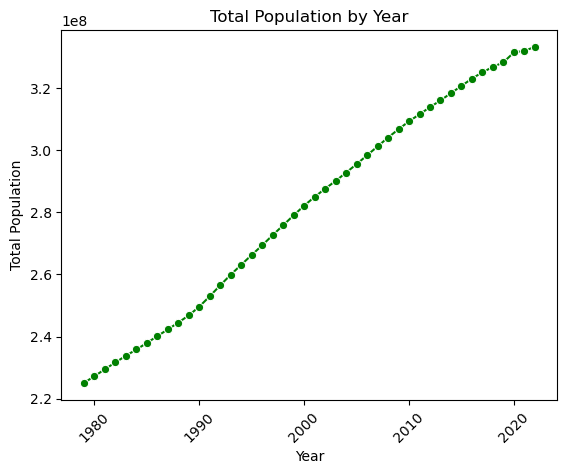

In [343]:
sns.lineplot(data=data, x="year", y="total_population", marker="o", color="green")
plt.title("Total Population by Year")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.xticks(rotation=45)
plt.show()


In [345]:
# Calculate the year-to-year population increase
data = data.sort_values(by="year", ascending=True)
data["Population Increase"] = data["total_population"].diff()  # Difference between consecutive years

# Replace NaN for the first row with 0 (as there's no previous year)
data["Population Increase"] = data["Population Increase"].fillna(0)

# Add a percentage increase (optional)
data["Percentage Increase (%)"] = (data["Population Increase"] / data["total_population"].shift(1)) * 100
data["Percentage Increase (%)"] = data["Percentage Increase (%)"].fillna(0).round(2)  # Fill NaN and round off

# Display the resulting DataFrame
new_df = data[["year", "total_population", "Population Increase", "Percentage Increase (%)"]]
new_df.head()

,year,total_population,Population Increase,Percentage Increase (%)
43,1979,225055000,0.0,0.00
42,1980,227225000,2170000.0,0.96
41,1981,229466000,2241000.0,0.99
40,1982,231664000,2198000.0,0.96
39,1983,233792000,2128000.0,0.92


In [347]:
# Wages across Education Columns General
education_cols = [
    # Less than High School
    'White_Men_Less_Than_High_School_Hourly_Wage', 'White_Women_Less_Than_High_School_Hourly_Wage',
    'Black_Men_Less_Than_High_School_Hourly_Wage', 'Black_Women_Less_Than_High_School_Hourly_Wage',

    # High School
    'White_Men_HS_Hourly_Wage', 'White_Women_HS_Hourly_Wage',
    'Black_Men_HS_Hourly_Wage', 'Black_Women_HS_Hourly_Wage',

    # Some College
    'White_Men_Some_College_Hourly_Wage', 'White_Women_Some_College_Hourly_Wage',
    'Black_Men_Some_College_Hourly_Wage', 'Black_Women_Some_College_Hourly_Wage',

    # Bachelors Degree
    'White_Men_Bachelors_Hourly_Wage', 'White_Women_Bachelors_Hourly_Wage',
    'Black_Men_Bachelors_Hourly_Wage', 'Black_Women_Bachelors_Degree_Hourly_Wage',

    # Advanced Degree
    'White_Men_Advanced_Hourly_Wage', 'White_Women_Advanced_Hourly_Wage',
    'Black_Men_Advanced_Hourly_Wage', 'Black_Women_Advanced_Degree_Hourly_Wage'
]

# White/Black Men/Women Wages across Education Columns General
white_men_cols = [
    'White_Men_Less_Than_High_School_Hourly_Wage', 'White_Men_HS_Hourly_Wage',
    'White_Men_Some_College_Hourly_Wage', 'White_Men_Bachelors_Hourly_Wage',
    'White_Men_Advanced_Hourly_Wage'
]

black_men_cols = [
    'Black_Men_Less_Than_High_School_Hourly_Wage', 'Black_Men_HS_Hourly_Wage',
    'Black_Men_Some_College_Hourly_Wage', 'Black_Men_Bachelors_Hourly_Wage',
    'Black_Men_Advanced_Hourly_Wage'
]

white_women_cols = [
    'White_Women_Less_Than_High_School_Hourly_Wage', 'White_Women_HS_Hourly_Wage',
    'White_Women_Some_College_Hourly_Wage', 'White_Women_Bachelors_Hourly_Wage',
    'White_Women_Advanced_Hourly_Wage'
]

black_women_cols = [
    'Black_Women_Less_Than_High_School_Hourly_Wage', 'Black_Women_HS_Hourly_Wage',
    'Black_Women_Some_College_Hourly_Wage', 'Black_Women_Bachelors_Degree_Hourly_Wage',
    'Black_Women_Advanced_Degree_Hourly_Wage'
]

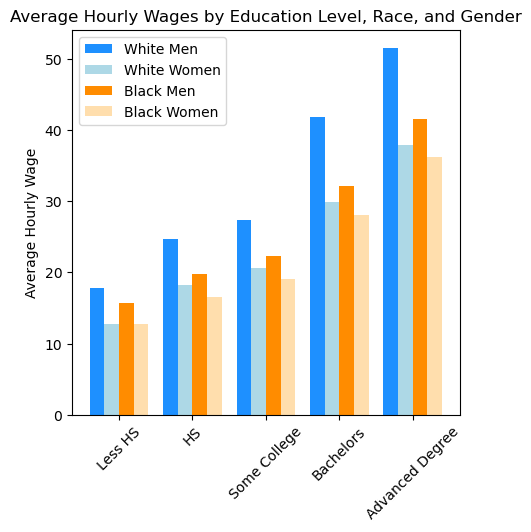

In [381]:
# Calculate the mean for each education level and gender
mean_wages = data[education_cols].mean()

# Create x positions for grouped bars (5 education levels)
x = np.arange(len(education_cols) // 4)  # 5 education levels (4 groups each)
width = 0.2  # Width of bars for closer side-by-side effect

# Separate men and women wages by race
white_men_wages = mean_wages[::4]   # Every 4th column starting from 0 (White Men)
white_women_wages = mean_wages[1::4] # Every 4th column starting from 1 (White Women)
black_men_wages = mean_wages[2::4]   # Every 4th column starting from 2 (Black Men)
black_women_wages = mean_wages[3::4] # Every 4th column starting from 3 (Black Women)

# Bar plot
plt.figure(figsize=(5, 5))
plt.bar(x - 1.5 * width, white_men_wages, width, color='dodgerblue', label='White Men')
plt.bar(x - 0.5 * width, white_women_wages, width, color='lightblue', label='White Women')
plt.bar(x + 0.5 * width, black_men_wages, width, color='darkorange', label='Black Men')
plt.bar(x + 1.5 * width, black_women_wages, width, color='navajowhite', label='Black Women')

# X-axis labels (education levels)
x_labels = [
    'Less HS', 'HS', 'Some College', 
    'Bachelors', 'Advanced Degree'
]

# Fix x-ticks to match grouped bars
plt.xticks(ticks=x, labels=x_labels, rotation=45)

plt.ylabel("Average Hourly Wage")
plt.title("Average Hourly Wages by Education Level, Race, and Gender")
plt.legend()

plt.savefig('avg_wage_across_year_based_on_education', bbox_inches='tight')
plt.show()


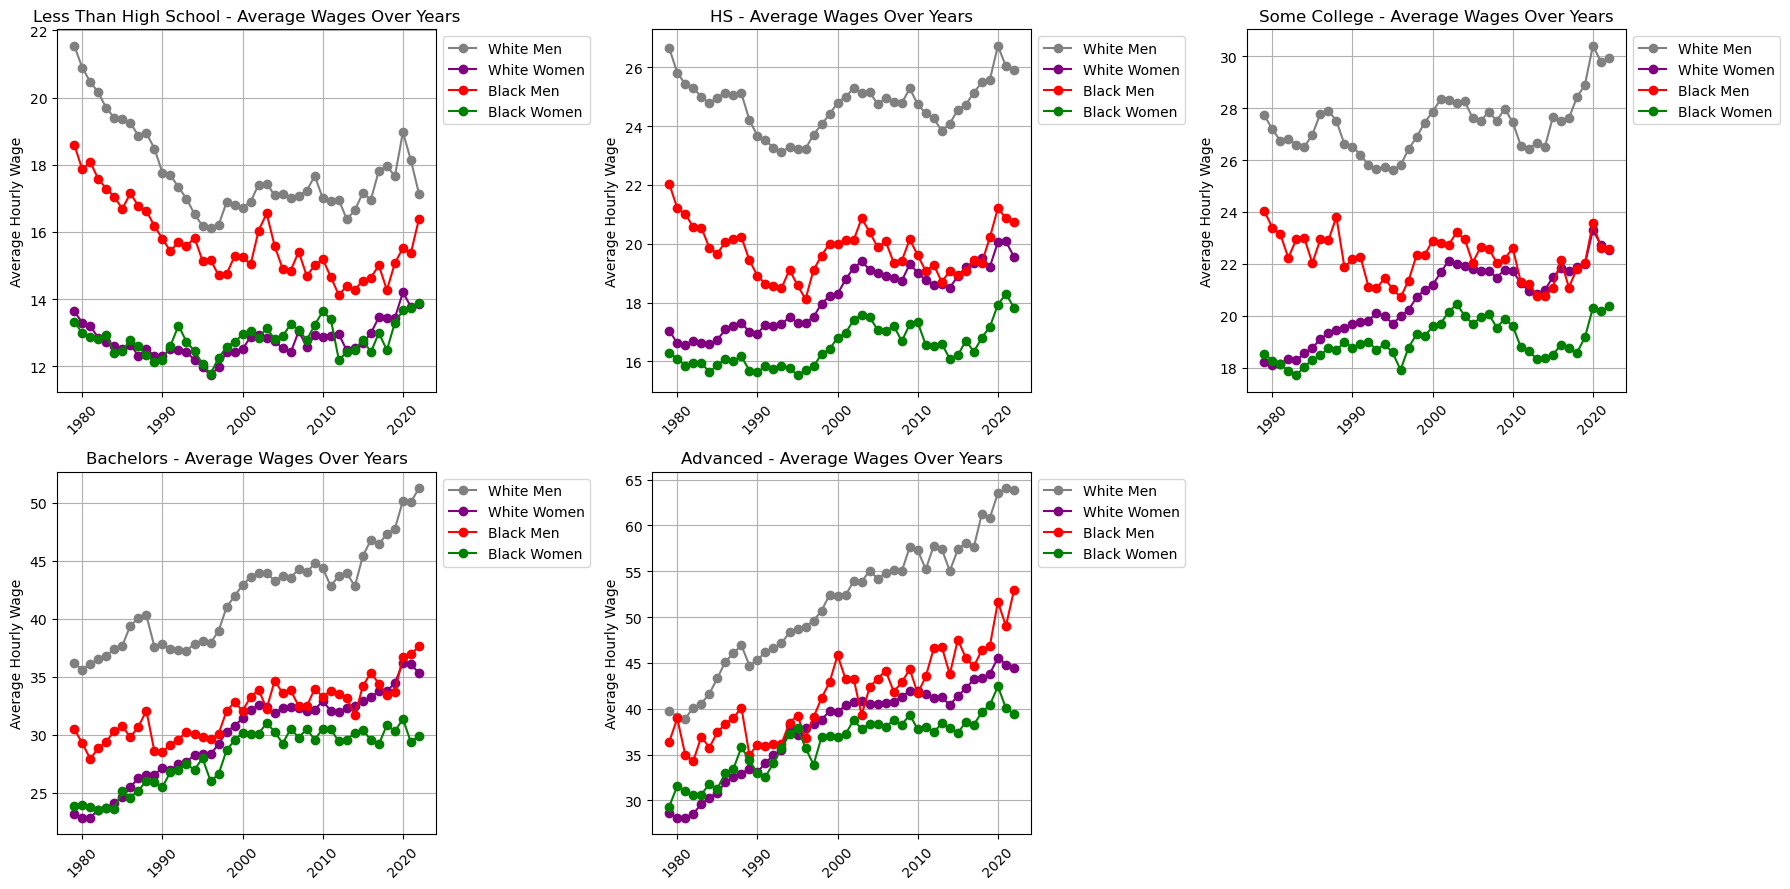

In [371]:
# plt.figure(figsize=(10, 10))

# Group data by year and calculate mean wages
yearly_avg_wages = data.groupby('year')[education_cols].mean()

# Iterate over education levels to create subplots
# Adjust layout to show 3 plots per row
plt.figure(figsize=(18, 9))  # Set figure size for better visualization

for i, level in enumerate(['Less_Than_High_School', 'HS', 'Some_College', 'Bachelors', 'Advanced']):
    
    # Filter columns for the specific education level
    level_cols = [col for col in education_cols if level in col]
    mean_wages = yearly_avg_wages[level_cols]
    
    # Extract wages for each group (White Men, White Women, Black Men, Black Women)
    white_men_wages = mean_wages.iloc[:, 0]
    white_women_wages = mean_wages.iloc[:, 1]
    black_men_wages = mean_wages.iloc[:, 2]
    black_women_wages = mean_wages.iloc[:, 3]

    # Create subplot for each education level (3 per row, 2 rows)
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns (6 slots total, 5 plots used)
    
    # Plot lines for each group
    plt.plot(yearly_avg_wages.index, white_men_wages, marker='o', color='gray', label='White Men')
    plt.plot(yearly_avg_wages.index, white_women_wages, marker='o', color='purple', label='White Women')
    plt.plot(yearly_avg_wages.index, black_men_wages, marker='o', color='red', label='Black Men')
    plt.plot(yearly_avg_wages.index, black_women_wages, marker='o', color='green', label='Black Women')
    
    # Customize the plot
    plt.xticks(rotation=45)
    plt.title(f"{level.replace('_', ' ')} - Average Wages Over Years")
    plt.ylabel("Average Hourly Wage")
    plt.grid(True)  # Add grid for better readability
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()


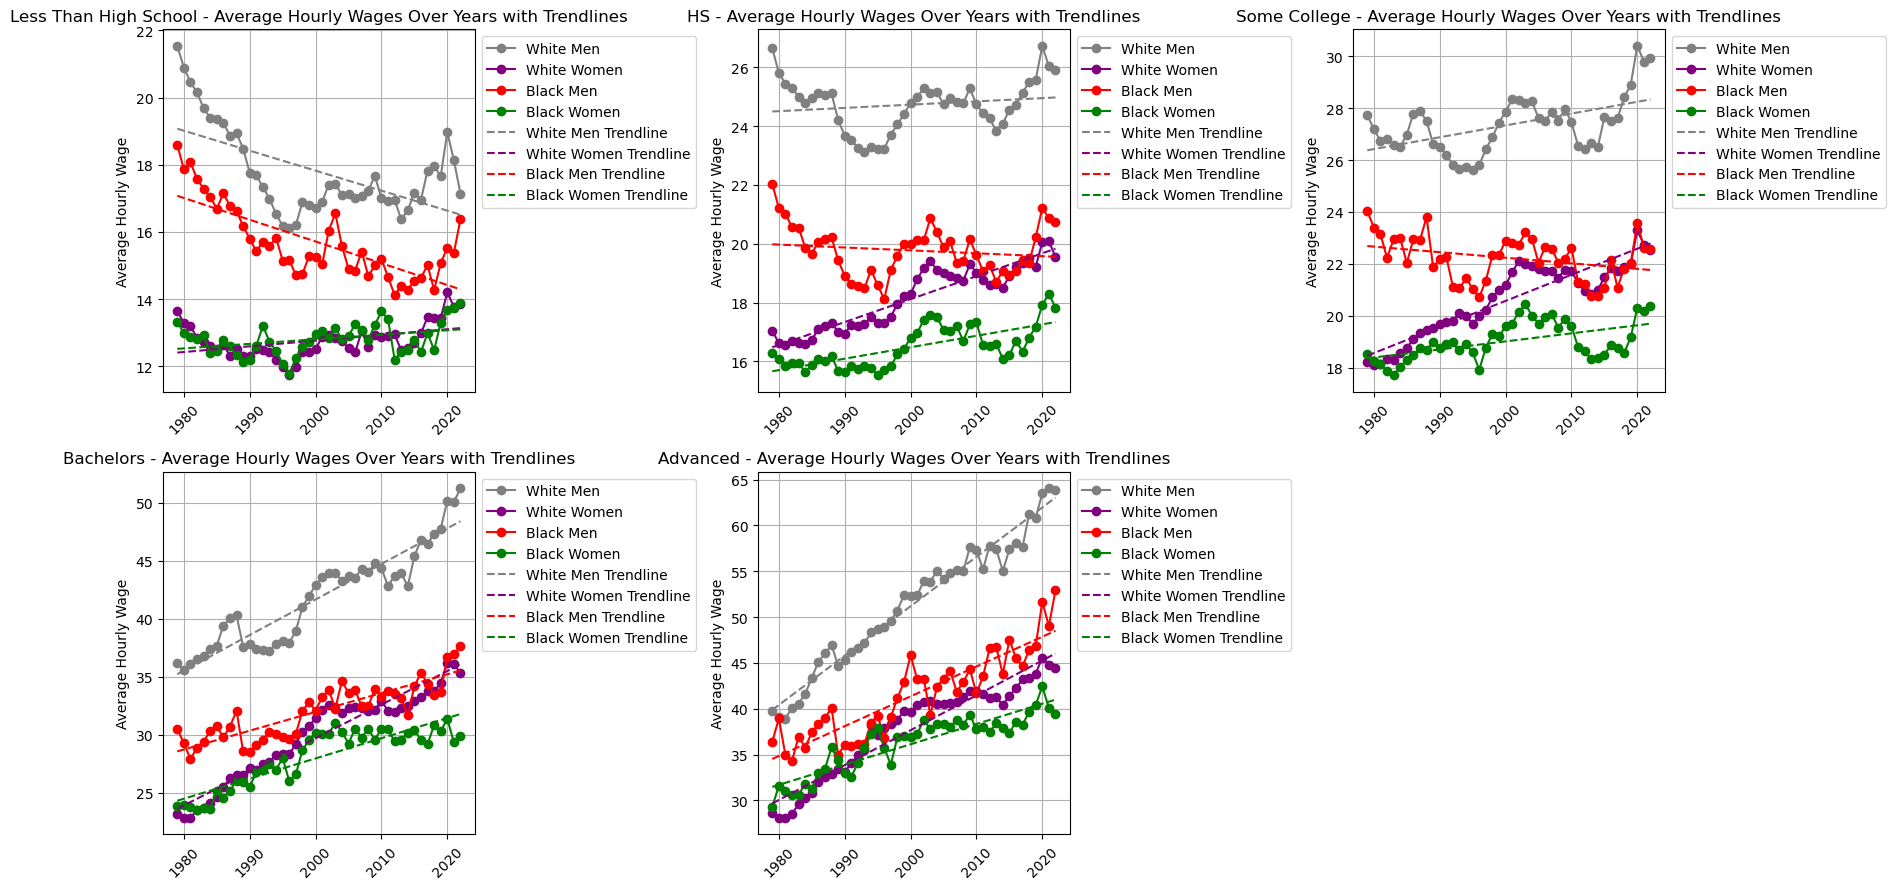

In [383]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

plt.figure(figsize=(18,9))

# Group data by year and calculate mean wages
yearly_avg_wages = data.groupby('year')[education_cols].mean()

# Iterate over education levels to create subplots
for i, level in enumerate(['Less_Than_High_School', 'HS', 'Some_College', 'Bachelors', 'Advanced']):
    
    # Filter columns for the specific education level
    level_cols = [col for col in education_cols if level in col]
    mean_wages = yearly_avg_wages[level_cols]
    
    # Extract wages for each group
    white_men_wages = mean_wages.iloc[:, 0]
    white_women_wages = mean_wages.iloc[:, 1]
    black_men_wages = mean_wages.iloc[:, 2]
    black_women_wages = mean_wages.iloc[:, 3]

    x = np.arange(len(yearly_avg_wages))  # X-axis for trendline fitting

    # Fit linear trendlines
    trend_white_men = Polynomial.fit(x, white_men_wages, 1)  # Linear trend (degree 1)
    trend_white_women = Polynomial.fit(x, white_women_wages, 1)
    trend_black_men = Polynomial.fit(x, black_men_wages, 1)
    trend_black_women = Polynomial.fit(x, black_women_wages, 1)

    # Get trendline values
    white_men_trendline = trend_white_men(x)
    white_women_trendline = trend_white_women(x)
    black_men_trendline = trend_black_men(x)
    black_women_trendline = trend_black_women(x)

    # Create subplot for each education level
    plt.subplot(2, 3, i+1)
    
    # Plot lines for each group
    plt.plot(yearly_avg_wages.index, white_men_wages, marker='o', color='gray', label='White Men')
    plt.plot(yearly_avg_wages.index, white_women_wages, marker='o', color='purple', label='White Women')
    plt.plot(yearly_avg_wages.index, black_men_wages, marker='o', color='red', label='Black Men')
    plt.plot(yearly_avg_wages.index, black_women_wages, marker='o', color='green', label='Black Women')
    
    # Plot trendlines
    plt.plot(yearly_avg_wages.index, white_men_trendline, linestyle='--', color='gray', label='White Men Trendline')
    plt.plot(yearly_avg_wages.index, white_women_trendline, linestyle='--', color='purple', label='White Women Trendline')
    plt.plot(yearly_avg_wages.index, black_men_trendline, linestyle='--', color='red', label='Black Men Trendline')
    plt.plot(yearly_avg_wages.index, black_women_trendline, linestyle='--', color='green', label='Black Women Trendline')

    # Customize the plot
    plt.xticks(rotation=45)
    plt.title(f"{level.replace('_', ' ')} - Average Hourly Wages Over Years with Trendlines")
    plt.ylabel("Average Hourly Wage")
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.savefig('avg_wage_across__each_year_based_on_education', bbox_inches='tight')
plt.show()



In [275]:
# Step 2: Calculate Average Wages for Each Group Across Education Levels
data['White_Men_Avg_Wage'] = data[white_men_cols].mean(axis=1)
data['Black_Men_Avg_Wage'] = data[black_men_cols].mean(axis=1)
data['White_Women_Avg_Wage'] = data[white_women_cols].mean(axis=1)
data['Black_Women_Avg_Wage'] = data[black_women_cols].mean(axis=1)

# Step 3: Display the Results
avg_wage_df = data[['year', 'White_Men_Avg_Wage', 'Black_Men_Avg_Wage', 'White_Women_Avg_Wage', 'Black_Women_Avg_Wage']]
avg_wage_df.tail()



,year,White_Men_Avg_Wage,Black_Men_Avg_Wage,White_Women_Avg_Wage,Black_Women_Avg_Wage
4,2018,36.082,27.058,26.392,23.670
3,2019,36.148,27.582,26.590,24.076
2,2020,37.950,29.736,27.870,25.144
1,2021,37.610,28.966,27.502,24.326
0,2022,37.616,30.046,27.136,24.286


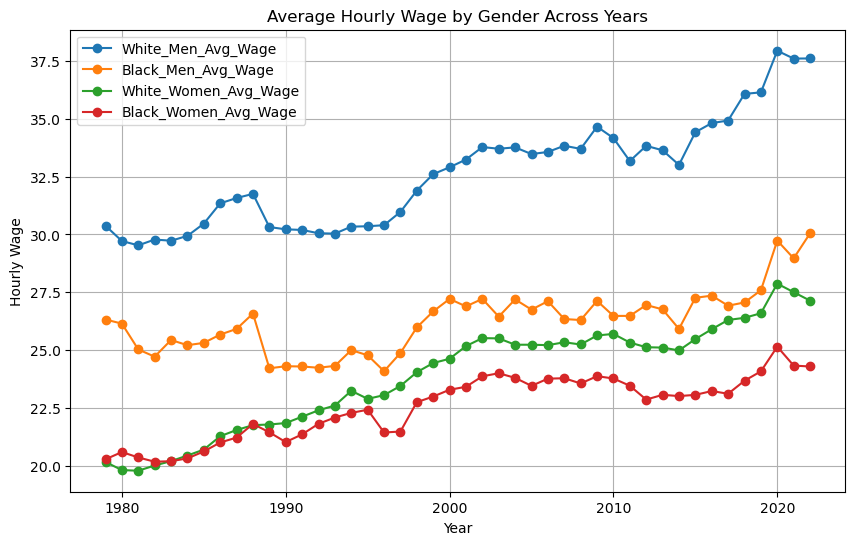

In [385]:
plt.figure(figsize=(10, 6))
for col in ['White_Men_Avg_Wage', 'Black_Men_Avg_Wage', 'White_Women_Avg_Wage', 'Black_Women_Avg_Wage']:
    plt.plot(avg_wage_df['year'], avg_wage_df[col], marker='o', label=col)

plt.title("Average Hourly Wage by Gender Across Years")
plt.xlabel("Year")
plt.ylabel("Hourly Wage")
plt.legend()
plt.grid(True)
plt.savefig('avg_wage_by_gender_across_years', bbox_inches='tight')
plt.show()

In [401]:
# Step 1: Calculate Wage Gaps (Absolute and Percentage)
avg_wage_df['White_Men_vs_Black_Men_Gap'] = abs(avg_wage_df['White_Men_Avg_Wage'] - avg_wage_df['Black_Men_Avg_Wage'])
avg_wage_df['White_Women_vs_Black_Women_Gap'] = abs(avg_wage_df['White_Women_Avg_Wage'] - avg_wage_df['Black_Women_Avg_Wage'])

avg_wage_df['White_Men_vs_White_Women_Gap'] = abs(avg_wage_df['White_Men_Avg_Wage'] - avg_wage_df['White_Women_Avg_Wage'])
avg_wage_df['Black_Men_vs_Black_Women_Gap'] = abs(avg_wage_df['Black_Men_Avg_Wage'] - avg_wage_df['Black_Women_Avg_Wage'])

# Percentage Difference
avg_wage_df['White_Men_vs_Black_Men_Gap_Percent'] = (
    avg_wage_df['White_Men_vs_Black_Men_Gap'] / ((avg_wage_df['White_Men_Avg_Wage'] + avg_wage_df['Black_Men_Avg_Wage']) / 2) 
) * 100

avg_wage_df['White_Women_vs_Black_Women_Gap_Percent'] = (
    avg_wage_df['White_Women_vs_Black_Women_Gap'] / ((avg_wage_df['White_Women_Avg_Wage'] + avg_wage_df['Black_Women_Avg_Wage']) / 2) 
) * 100

avg_wage_df['White_Men_vs_White_Women_Gap_Percent'] = (
    avg_wage_df['White_Men_vs_White_Women_Gap'] / ((avg_wage_df['White_Men_Avg_Wage'] + avg_wage_df['White_Women_Avg_Wage']) / 2) 
) * 100

avg_wage_df['Black_Men_vs_Black_Women_Gap_Percent'] = (
    avg_wage_df['Black_Men_vs_Black_Women_Gap'] / ((avg_wage_df['Black_Men_Avg_Wage'] + avg_wage_df['Black_Women_Avg_Wage']) / 2) 
) * 100

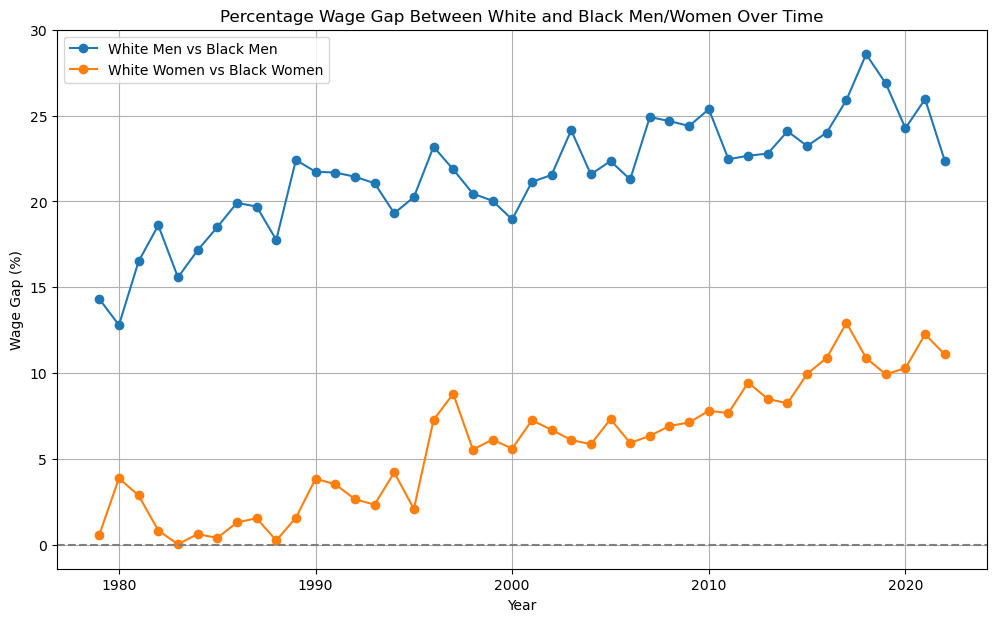

In [403]:
plt.figure(figsize=(12, 7))

# Plot Percentage Wage Gaps for Men and Women
plt.plot(avg_wage_df['year'], avg_wage_df['White_Men_vs_Black_Men_Gap_Percent'], marker='o', label='White Men vs Black Men')
plt.plot(avg_wage_df['year'], avg_wage_df['White_Women_vs_Black_Women_Gap_Percent'], marker='o', label='White Women vs Black Women')

# Customize Plot
plt.title("Percentage Wage Gap Between White and Black Men/Women Over Time")
plt.xlabel("Year")
plt.ylabel("Wage Gap (%)")
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0%
plt.legend()
plt.grid(True)

plt.show()

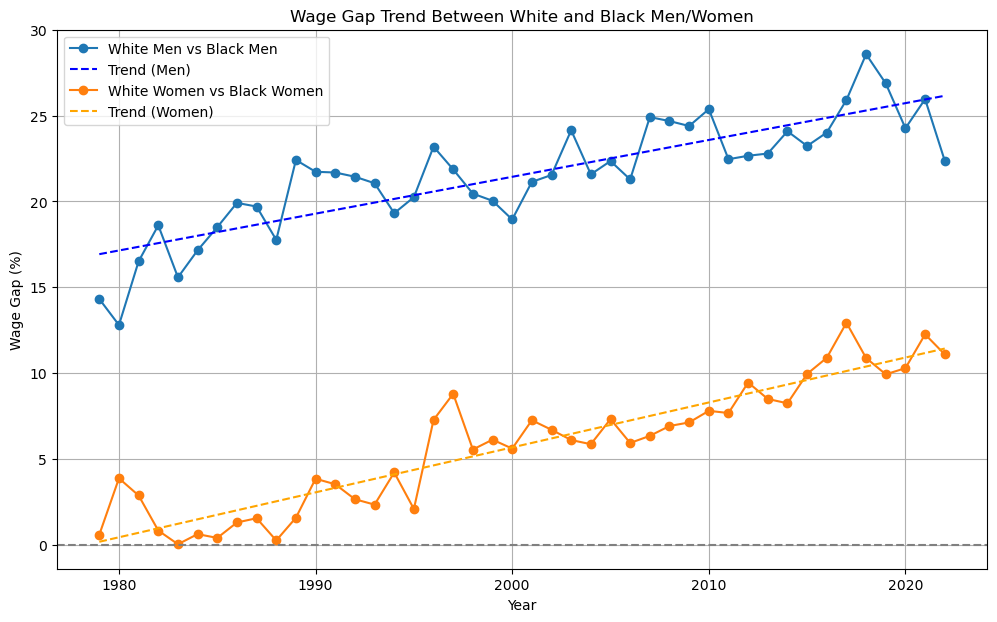

In [405]:
import numpy as np

# Fit Trendline to See Slope of Change
x = avg_wage_df['year']
y_men = avg_wage_df['White_Men_vs_Black_Men_Gap_Percent']
y_women = avg_wage_df['White_Women_vs_Black_Women_Gap_Percent']

z_men = np.polyfit(x, y_men, 1)
z_women = np.polyfit(x, y_women, 1)
p_men = np.poly1d(z_men)
p_women = np.poly1d(z_women)

# Plot with Trendlines
plt.figure(figsize=(12, 7))
plt.plot(x, y_men, marker='o', label='White Men vs Black Men')
plt.plot(x, p_men(x), linestyle='--', color='blue', label='Trend (Men)')
plt.plot(x, y_women, marker='o', label='White Women vs Black Women')
plt.plot(x, p_women(x), linestyle='--', color='orange', label='Trend (Women)')

plt.title("Wage Gap Trend Between White and Black Men/Women")
plt.xlabel("Year")
plt.ylabel("Wage Gap (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)

plt.show()


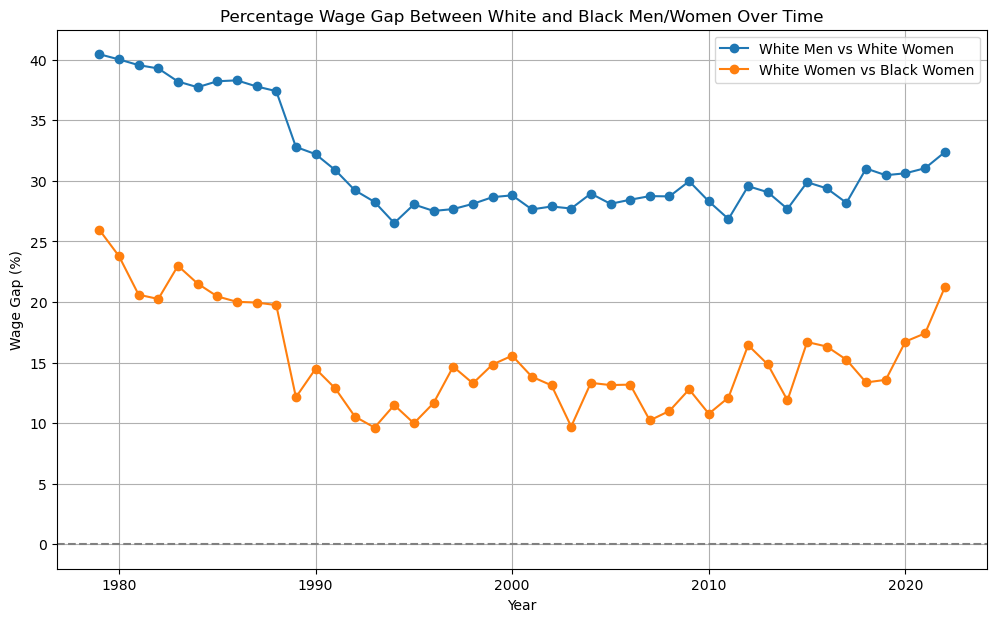

In [407]:
plt.figure(figsize=(12, 7))

# Plot Percentage Wage Gaps for Men and Women
plt.plot(avg_wage_df['year'], avg_wage_df['White_Men_vs_White_Women_Gap_Percent'], marker='o', label='White Men vs White Women')
plt.plot(avg_wage_df['year'], avg_wage_df['Black_Men_vs_Black_Women_Gap_Percent'], marker='o', label='White Women vs Black Women')

# Customize Plot
plt.title("Percentage Wage Gap Between White and Black Men/Women Over Time")
plt.xlabel("Year")
plt.ylabel("Wage Gap (%)")
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0%
plt.legend()
plt.grid(True)

plt.show()

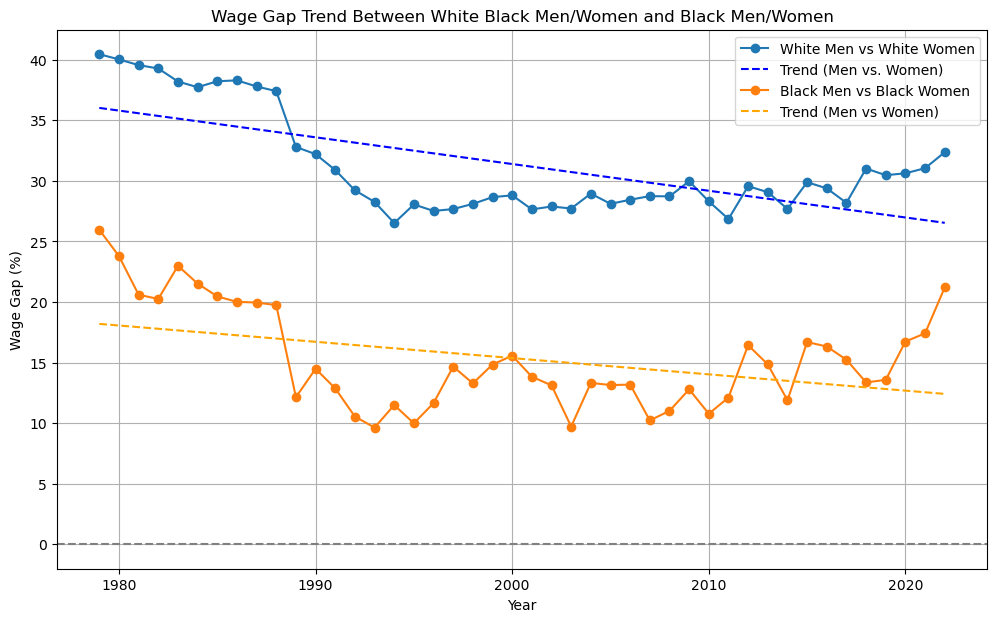

In [415]:
import numpy as np

# Fit Trendline to See Slope of Change
x = avg_wage_df['year']
y_men = avg_wage_df['White_Men_vs_White_Women_Gap_Percent']
y_women = avg_wage_df['Black_Men_vs_Black_Women_Gap_Percent']

z_men = np.polyfit(x, y_men, 1)
z_women = np.polyfit(x, y_women, 1)
p_men = np.poly1d(z_men)
p_women = np.poly1d(z_women)

# Plot with Trendlines
plt.figure(figsize=(12, 7))
plt.plot(x, y_men, marker='o', label='White Men vs White Women')
plt.plot(x, p_men(x), linestyle='--', color='blue', label='Trend (Men vs. Women)')
plt.plot(x, y_women, marker='o', label='Black Men vs Black Women')
plt.plot(x, p_women(x), linestyle='--', color='orange', label='Trend (Men vs Women)')

plt.title("Wage Gap Trend Between White Black Men/Women and Black Men/Women")
plt.xlabel("Year")
plt.ylabel("Wage Gap (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()

plt.grid(True)
plt.savefig('percentage_wage_gap', bbox_inches='tight')
plt.show()

In [290]:
data["White_Women_Advanced_Hourly_Wage"].mean()

37.84590909090909

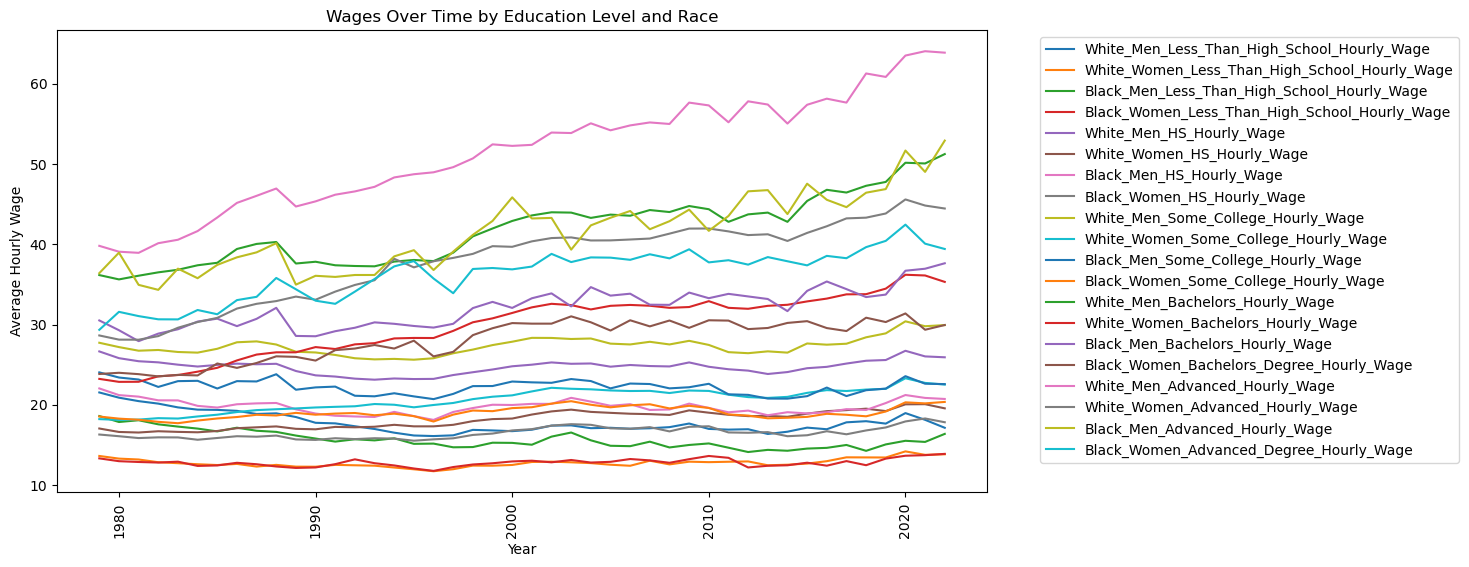

In [292]:
data.groupby('year')[education_cols].mean().plot(
    kind='line', figsize=(12, 6), title='Wages Over Time by Education Level and Race'
)
plt.xticks(rotation=90)
plt.ylabel('Average Hourly Wage')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

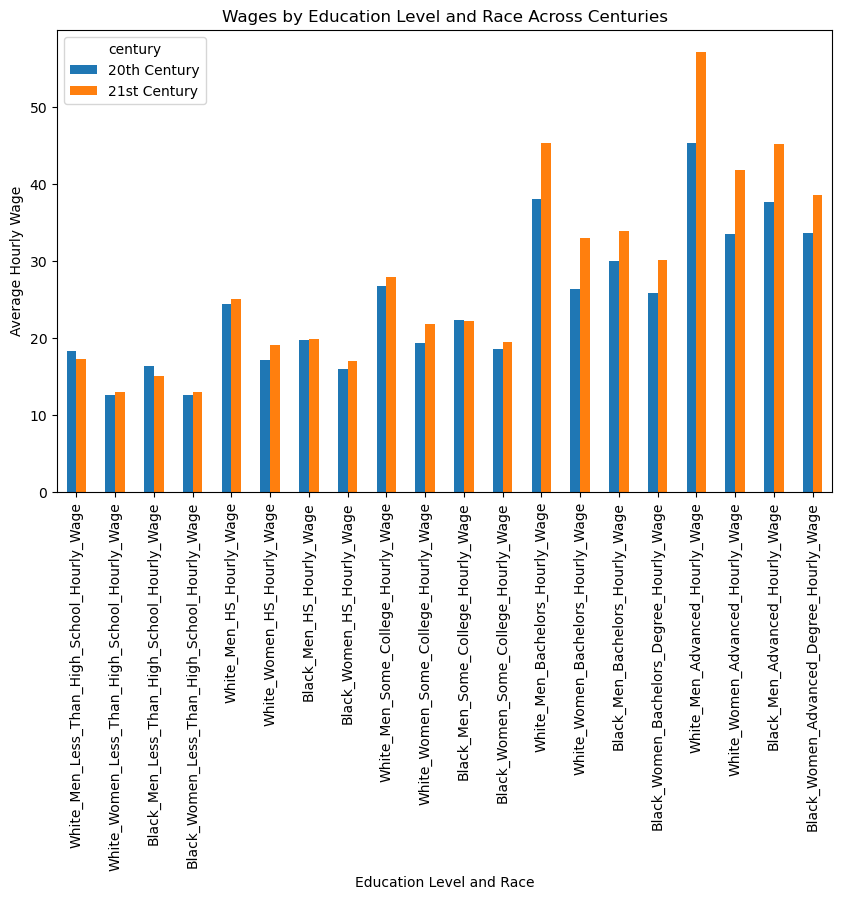

In [294]:
import matplotlib.pyplot as plt

# Categorize years into 20th and 21st centuries
data['century'] = data['year'].apply(lambda x: '20th Century' if x < 2000 else '21st Century')

# Group by century and calculate average wages
century_wages = data.groupby('century')[education_cols].mean()

# Plot the bar chart
century_wages.T.plot(kind='bar', figsize=(10, 6), title="Wages by Education Level and Race Across Centuries")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Label axes
plt.ylabel('Average Hourly Wage')
plt.xlabel('Education Level and Race')

plt.show()

In [296]:
# Create a new DataFrame for wage differences
wage_diff_df = pd.DataFrame()

# Calculate absolute differences
wage_diff_df['year'] = data['year']
wage_diff_df['Less_Than_High_School_Diff'] = data['White_Less_Than_High_School_Hourly_Wage'] - data['Black_Less_Than_High_School_Hourly_Wage']
wage_diff_df['HS_Diff'] = data['White_HS_Hourly_Wage'] - data['Black_HS_Hourly_Wage']
wage_diff_df['Some_College_Diff'] = data['White_Some_College_Hourly_Wage'] - data['Black_Some_College_Hourly_Wage']
wage_diff_df['Bachelors_Diff'] = data['White_Bachelors_Hourly_Wage'] - data['Black_Bachelors_Hourly_Wage']
wage_diff_df['Advanced_Diff'] = data['White_Advanced_Hourly_Wage'] - data['Black_Advanced_Hourly_Wage']

# Calculate percentage differences
wage_diff_df['Less_Than_High_School_Percent_Diff'] = ((wage_diff_df['Less_Than_High_School_Diff'] / data['Black_Less_Than_High_School_Hourly_Wage']) * 100).round(2)
wage_diff_df['HS_Percent_Diff'] = ((wage_diff_df['HS_Diff'] / data['Black_HS_Hourly_Wage']) * 100).round(2)
wage_diff_df['Some_College_Percent_Diff'] = ((wage_diff_df['Some_College_Diff'] / data['Black_Some_College_Hourly_Wage']) * 100).round(2)
wage_diff_df['Bachelors_Percent_Diff'] = ((wage_diff_df['Bachelors_Diff'] / data['Black_Bachelors_Hourly_Wage']) * 100).round(2)
wage_diff_df['Advanced_Percent_Diff'] = ((wage_diff_df['Advanced_Diff'] / data['Black_Advanced_Hourly_Wage']) * 100).round(2)

wage_diff_df['Less_Than_High_School_Percent_Diff'].plot(
    kind='bar', figsize=(10, 6), title='Percentage Wage Differences Between White and Black by Education Level'
)




KeyError: 'White_Less_Than_High_School_Hourly_Wage'

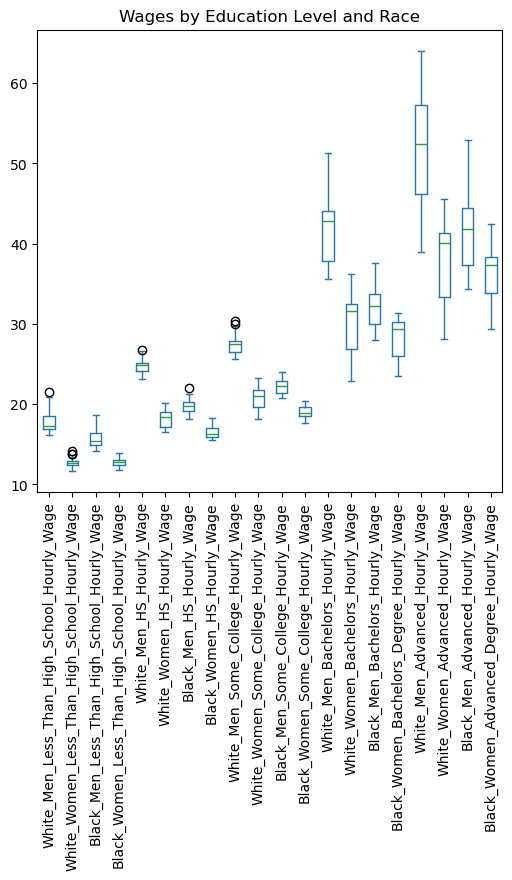

In [298]:
data[education_cols].plot(kind='box', figsize=(6, 6), title="Wages by Education Level and Race")
plt.xticks(rotation=90)
plt.show()

In [417]:
employment_cols = [
    # Less than High School
    'White_Men_Employment_Ratio_Less_Than_High_School', 
    'White_Women_Employment_Ratio_Less_Than_High_School',
    'Black_Men_Employment_Ratio_Less_Than_High_School', 
    'Black_Women_Employment_Ratio_Less_Than_High_School',

    # High School
    'White_Men_Employment_Ratio_High_School', 
    'White_Women_Employment_Ratio_High_School',
    'Black_Men_Employment_Ratio_High_School', 
    'Black_Women_Employment_Ratio_High_School',

    # Some College
    'White_Men_Employment_Ratio_Some_College', 
    'White_Women_Employment_Ratio_Some_College',
    'Black_Men_Employment_Ratio_Some_College', 
    'Black_Women_Employment_Ratio_Some_College',

    # Bachelors Degree
    'White_Men_Employment_Ratio_Bachelors_Degree', 
    'White_Women_Employment_Ratio_Bachelors_Degree',
    'Black_Men_Employment_Ratio_Bachelors_Degree', 
    'Black_Women_Employment_Ratio_Bachelors_Degree',

    # Advanced Degree
    'White_Men_Employment_Ratio_Advanced_Degree', 
    'White_Women_Employment_Ratio_Advanced_Degree',
    'Black_Men_Employment_Ratio_Advanced_Degree', 
    'Black_Women_Employment_Ratio_Advanced_Degree'
]


# White/Black Men/Women Employment Ratios across Education Levels

white_men_cols = [
    'White_Men_Employment_Ratio_Less_Than_High_School', 
    'White_Men_Employment_Ratio_High_School',
    'White_Men_Employment_Ratio_Some_College', 
    'White_Men_Employment_Ratio_Bachelors_Degree',
    'White_Men_Employment_Ratio_Advanced_Degree'
]

black_men_cols = [
    'Black_Men_Employment_Ratio_Less_Than_High_School', 
    'Black_Men_Employment_Ratio_High_School',
    'Black_Men_Employment_Ratio_Some_College', 
    'Black_Men_Employment_Ratio_Bachelors_Degree',
    'Black_Men_Employment_Ratio_Advanced_Degree'
]

white_women_cols = [
    'White_Women_Employment_Ratio_Less_Than_High_School', 
    'White_Women_Employment_Ratio_High_School',
    'White_Women_Employment_Ratio_Some_College', 
    'White_Women_Employment_Ratio_Bachelors_Degree',
    'White_Women_Employment_Ratio_Advanced_Degree'
]

black_women_cols = [
    'Black_Women_Employment_Ratio_Less_Than_High_School', 
    'Black_Women_Employment_Ratio_High_School',
    'Black_Women_Employment_Ratio_Some_College', 
    'Black_Women_Employment_Ratio_Bachelors_Degree',
    'Black_Women_Employment_Ratio_Advanced_Degree'
]


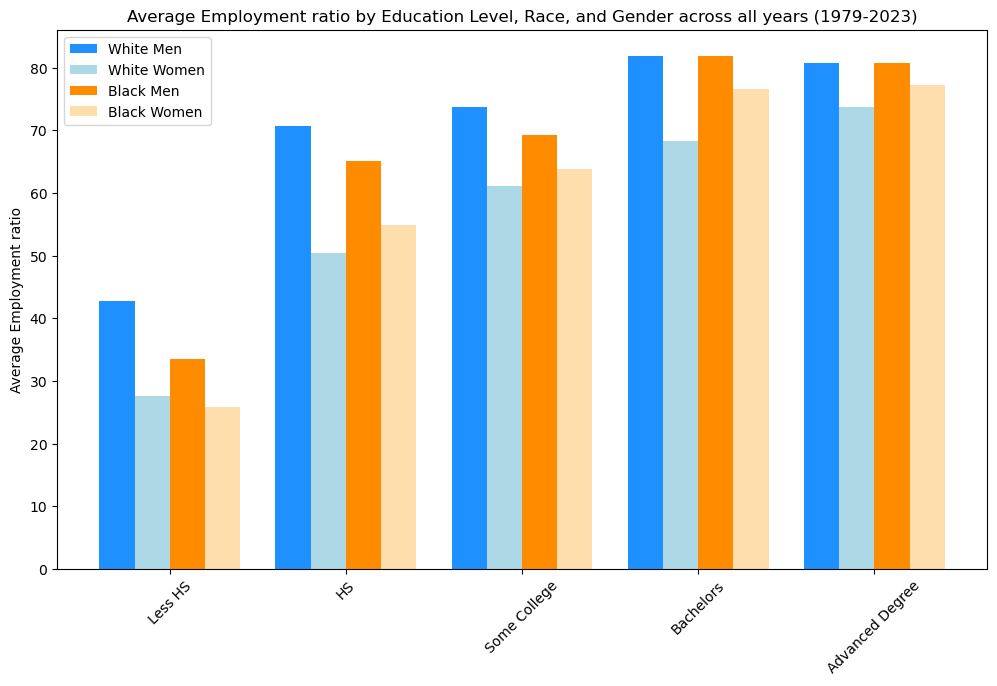

In [419]:
# Calculate the mean for each education level and gender
mean_employment_ratio = data[employment_cols].mean()

# Create x positions for grouped bars (5 education levels)
x = np.arange(len(employment_cols) // 4)  # 5 education levels (4 groups each)
width = 0.2  # Width of bars for closer side-by-side effect

# Separate men and women wages by race
white_men_employment_ratio = mean_employment_ratio[::4]   # Every 4th column starting from 0 (White Men)
white_women_employment_ratio = mean_employment_ratio[1::4] # Every 4th column starting from 1 (White Women)
black_men_employment_ratio = mean_employment_ratio[2::4]   # Every 4th column starting from 2 (Black Men)
black_women_employment_ratio = mean_employment_ratio[3::4] # Every 4th column starting from 3 (Black Women)

# Bar plot
plt.figure(figsize=(12, 7))
plt.bar(x - 1.5 * width, white_men_employment_ratio, width, color='dodgerblue', label='White Men')
plt.bar(x - 0.5 * width, white_women_employment_ratio, width, color='lightblue', label='White Women')
plt.bar(x + 0.5 * width, black_men_employment_ratio, width, color='darkorange', label='Black Men')
plt.bar(x + 1.5 * width, black_women_employment_ratio, width, color='navajowhite', label='Black Women')

# X-axis labels (education levels)
x_labels = [
    'Less HS', 'HS', 'Some College', 
    'Bachelors', 'Advanced Degree'
]

# Fix x-ticks to match grouped bars
plt.xticks(ticks=x, labels=x_labels, rotation=45)

plt.ylabel("Average Employment ratio")
plt.title("Average Employment ratio by Education Level, Race, and Gender across all years (1979-2023)")
plt.legend()

plt.show()

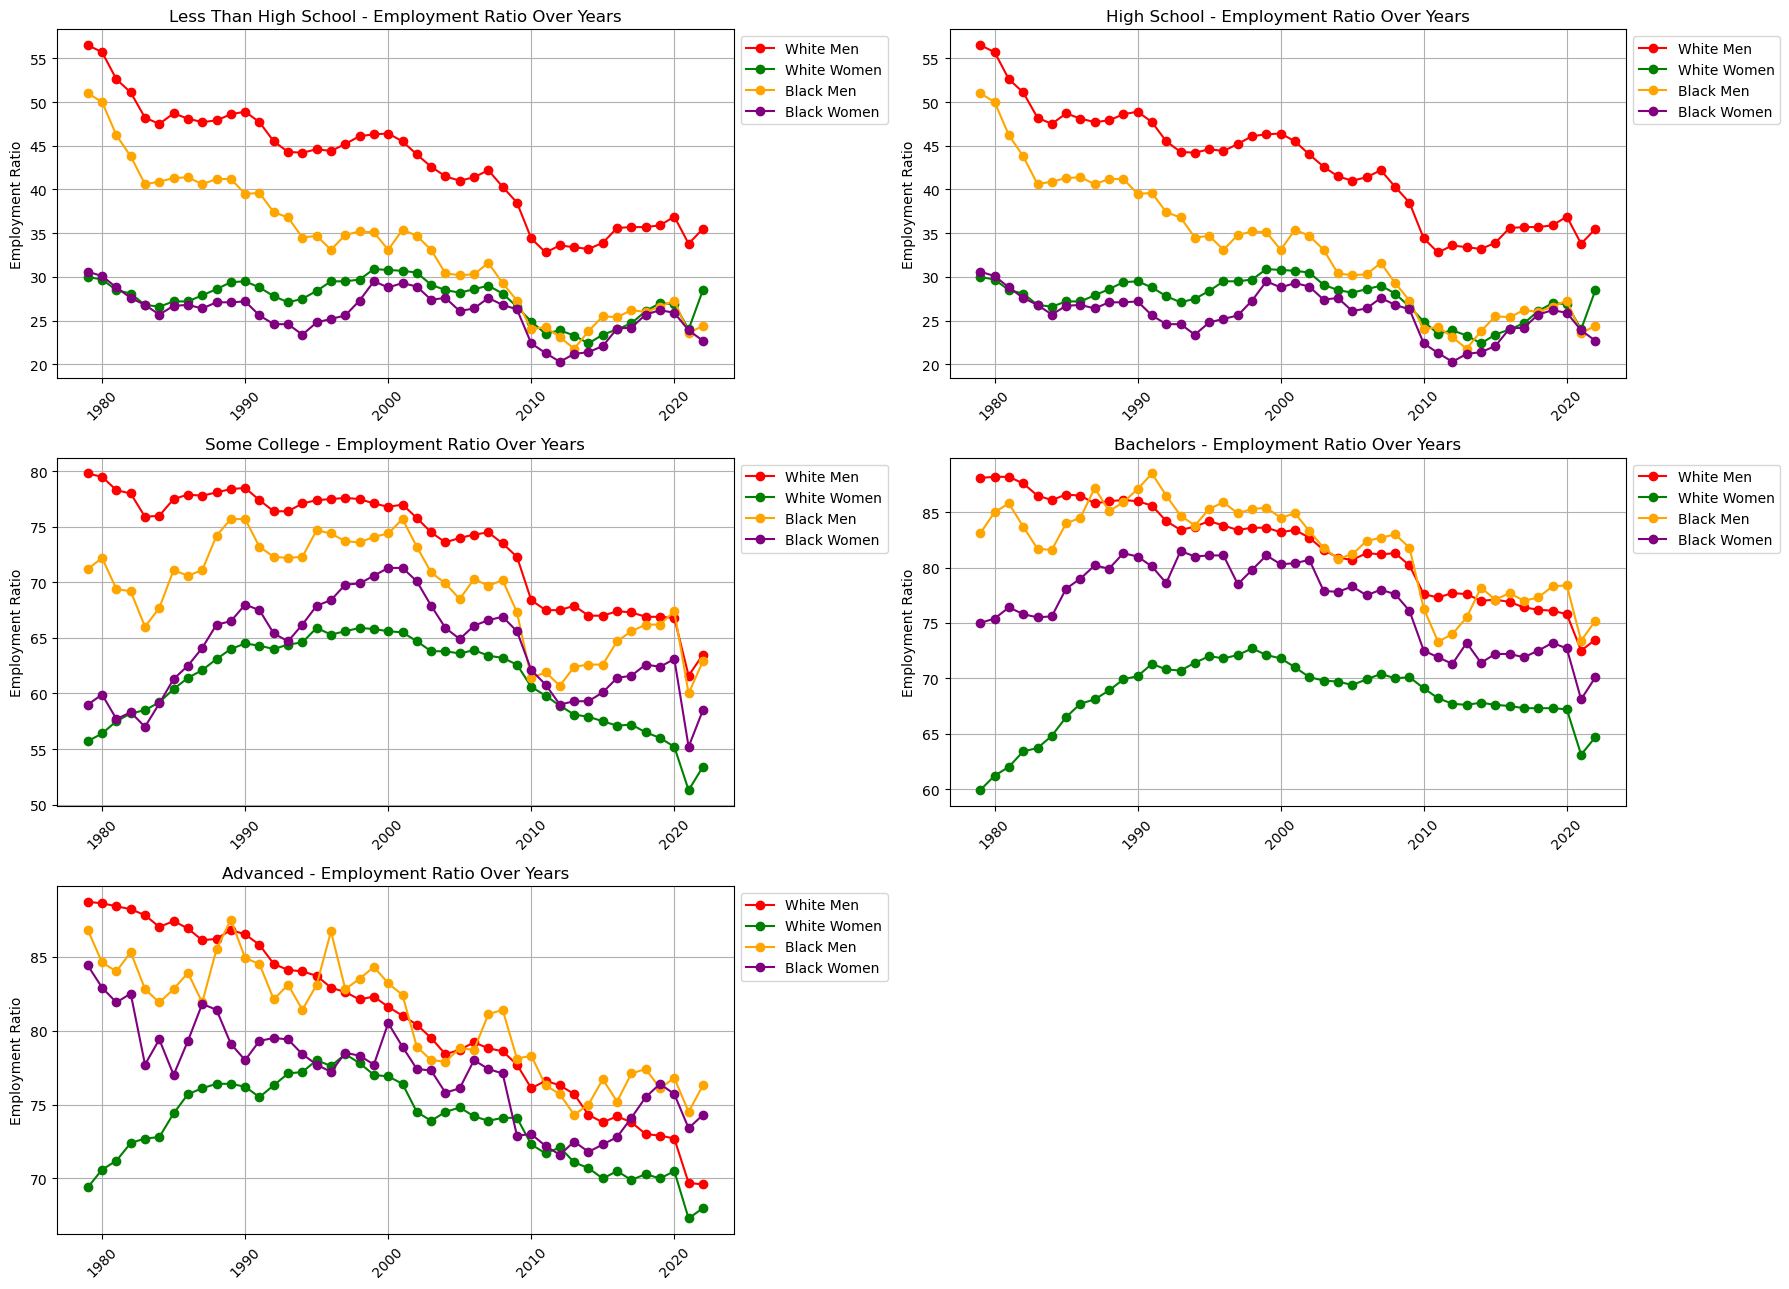

In [304]:
plt.figure(figsize=(18, 13))

# Group data by year and calculate mean wages
yearly_avg_employment_ratio = data.groupby('year')[employment_cols].mean()

# Iterate over education levels to create subplots
for i, level in enumerate(['Less_Than_High_School', 'High_School', 'Some_College', 'Bachelors', 'Advanced']):
    
    # Filter columns for the specific education level
    level_cols = [col for col in employment_cols if level in col]
    mean_employment_ratio = yearly_avg_employment_ratio[level_cols]
    
    # Extract wages for each group (White Men, White Women, Black Men, Black Women)
    white_men_employment_ratio = mean_employment_ratio.iloc[:, 0]
    white_women_employment_ratio = mean_employment_ratio.iloc[:, 1]
    black_men_employment_ratio = mean_employment_ratio.iloc[:, 2]
    black_women_employment_ratio = mean_employment_ratio.iloc[:, 3]

    # Create subplot for each education level
    plt.subplot(3, 2, i+1)  # 3 rows, 2 columns (adjust as needed)
    
    # Plot lines for each group
    plt.plot(yearly_avg_employment_ratio.index, white_men_employment_ratio, marker='o', color='red', label='White Men')
    plt.plot(yearly_avg_employment_ratio.index, white_women_employment_ratio, marker='o', color='green', label='White Women')
    plt.plot(yearly_avg_employment_ratio.index, black_men_employment_ratio, marker='o', color='orange', label='Black Men')
    plt.plot(yearly_avg_employment_ratio.index, black_women_employment_ratio, marker='o', color='purple', label='Black Women')
    
    # Customize the plot
    plt.xticks(rotation=45)
    plt.title(f"{level.replace('_', ' ')} - Employment Ratio Over Years")
    plt.ylabel("Employment Ratio")
    plt.grid(True)  # Add grid for better readability
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

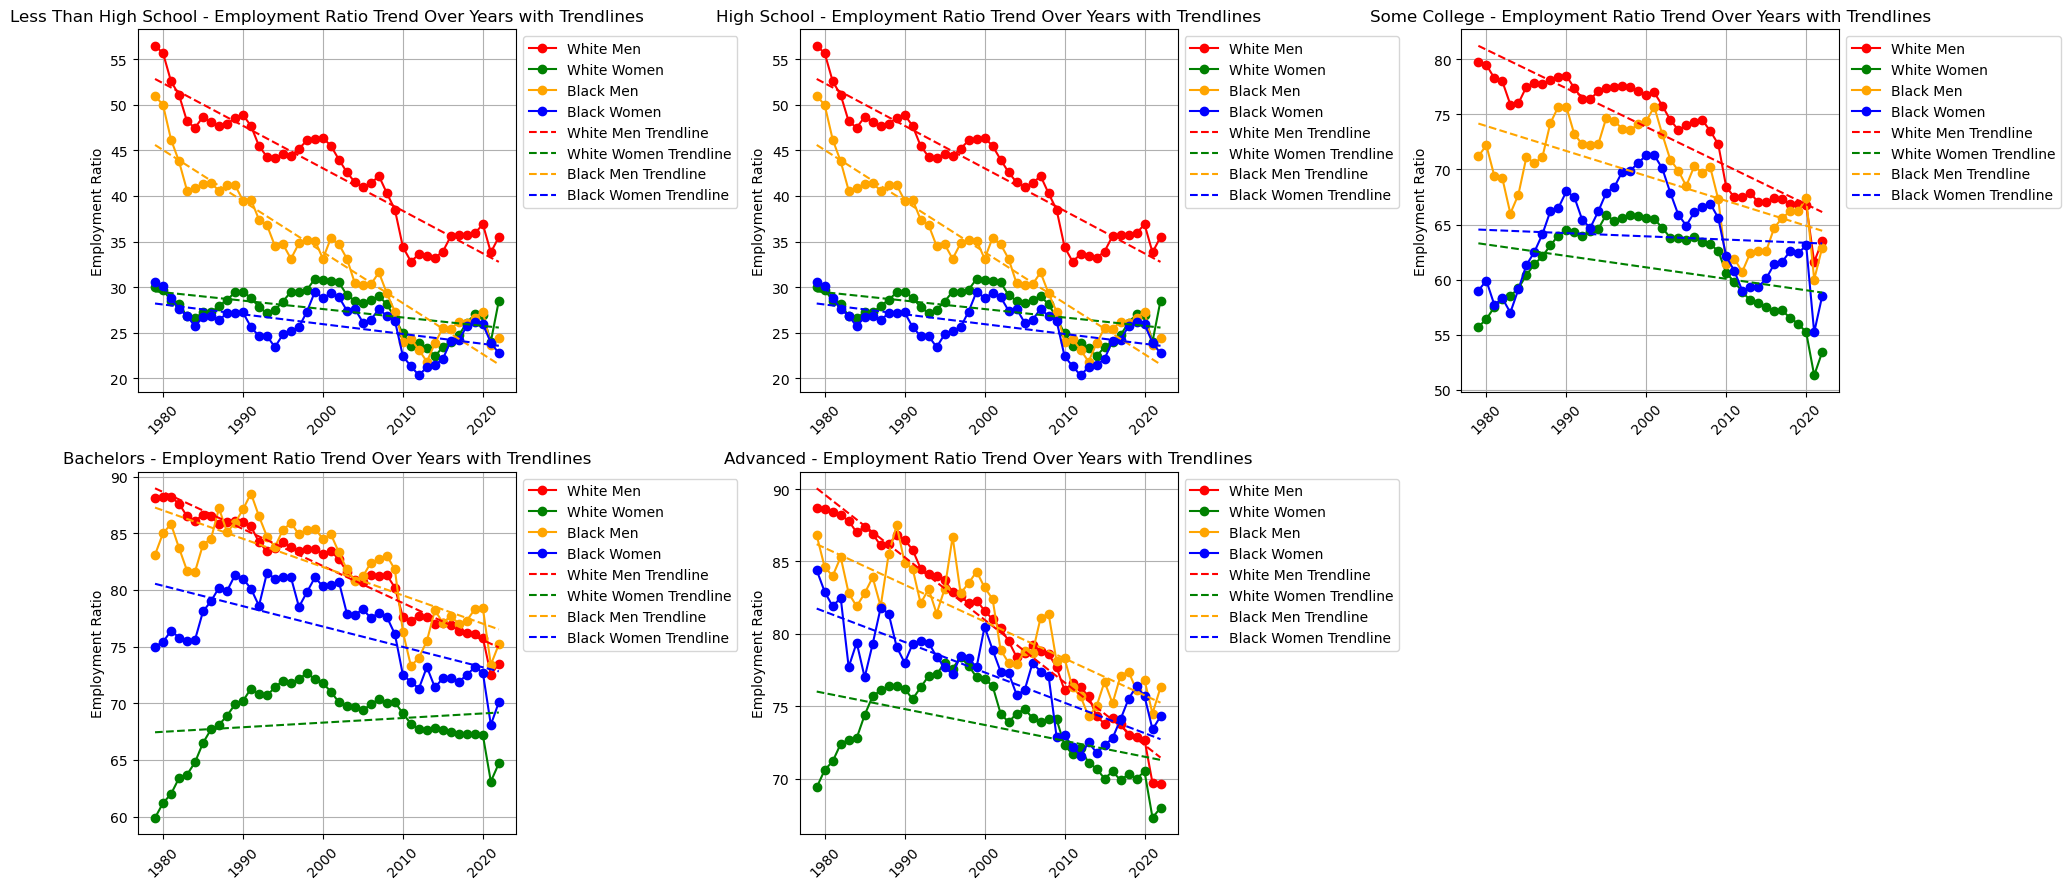

In [397]:
plt.figure(figsize=(20,9))

# Group data by year and calculate mean employment_ratio
yearly_avg_employment_ratio = data.groupby('year')[employment_cols].mean()

# Iterate over education levels to create subplots
for i, level in enumerate(['Less_Than_High_School', 'High_School', 'Some_College', 'Bachelors', 'Advanced']):
    
    # Filter columns for the specific education level
    level_cols = [col for col in employment_cols if level in col]
    mean_employment_ratio = yearly_avg_employment_ratio[level_cols]
    
    # Extract wages for each group
    white_men_employment_ratio = mean_employment_ratio.iloc[:, 0]
    white_women_employment_ratio = mean_employment_ratio.iloc[:, 1]
    black_men_employment_ratio = mean_employment_ratio.iloc[:, 2]
    black_women_employment_ratio = mean_employment_ratio.iloc[:, 3]

    x = np.arange(len(yearly_avg_employment_ratio))  # X-axis for trendline fitting

    # Fit linear trendlines
    trend_white_men = Polynomial.fit(x, white_men_employment_ratio, 1)  # Linear trend (degree 1)
    trend_white_women = Polynomial.fit(x, white_women_employment_ratio, 1)
    trend_black_men = Polynomial.fit(x, black_men_employment_ratio, 1)
    trend_black_women = Polynomial.fit(x, black_women_employment_ratio, 1)

    # Get trendline values
    white_men_trendline = trend_white_men(x)
    white_women_trendline = trend_white_women(x)
    black_men_trendline = trend_black_men(x)
    black_women_trendline = trend_black_women(x)

    # Create subplot for each education level
    plt.subplot(2, 3, i+1)
    
    # Plot lines for each group
    plt.plot(yearly_avg_employment_ratio.index, white_men_employment_ratio, marker='o', color='red', label='White Men')
    plt.plot(yearly_avg_employment_ratio.index, white_women_employment_ratio, marker='o', color='green', label='White Women')
    plt.plot(yearly_avg_employment_ratio.index, black_men_employment_ratio, marker='o', color='orange', label='Black Men')
    plt.plot(yearly_avg_employment_ratio.index, black_women_employment_ratio, marker='o', color='blue', label='Black Women')
    
    # Plot trendlines
    plt.plot(yearly_avg_employment_ratio.index, white_men_trendline, linestyle='--', color='red', label='White Men Trendline')
    plt.plot(yearly_avg_employment_ratio.index, white_women_trendline, linestyle='--', color='green', label='White Women Trendline')
    plt.plot(yearly_avg_employment_ratio.index, black_men_trendline, linestyle='--', color='orange', label='Black Men Trendline')
    plt.plot(yearly_avg_employment_ratio.index, black_women_trendline, linestyle='--', color='blue', label='Black Women Trendline')

    # Customize the plot
    plt.xticks(rotation=45)
    plt.title(f"{level.replace('_', ' ')} - Employment Ratio Trend Over Years with Trendlines")
    plt.ylabel("Employment Ratio")
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.savefig('employment_ratio_across__each_year_based_on_education', bbox_inches='tight')
plt.show()

In [421]:
# Step 2: Calculate Average Wages for Each Group Across Education Levels
data['White_Men_Avg_Employment_Ratio'] = data[white_men_cols].mean(axis=1)
data['Black_Men_Avg_Employment_Ratio'] = data[black_men_cols].mean(axis=1)
data['White_Women_Avg_Employment_Ratio'] = data[white_women_cols].mean(axis=1)
data['Black_Women_Avg_Employment_Ratio'] = data[black_women_cols].mean(axis=1)

# Step 3: Display the Results
avg_employment_ratio_df = data[['year', 'White_Men_Avg_Employment_Ratio', 'Black_Men_Avg_Employment_Ratio', 'White_Women_Avg_Employment_Ratio', 'Black_Women_Avg_Employment_Ratio']]
avg_employment_ratio_df.tail()

,year,White_Men_Avg_Employment_Ratio,Black_Men_Avg_Employment_Ratio,White_Women_Avg_Employment_Ratio,Black_Women_Avg_Employment_Ratio
4,2018,62.94,61.12,52.74,57.50
3,2019,62.98,61.34,52.76,58.00
2,2020,63.10,61.70,52.82,57.82
1,2021,59.28,56.60,49.12,53.00
0,2022,60.36,58.94,51.16,54.74


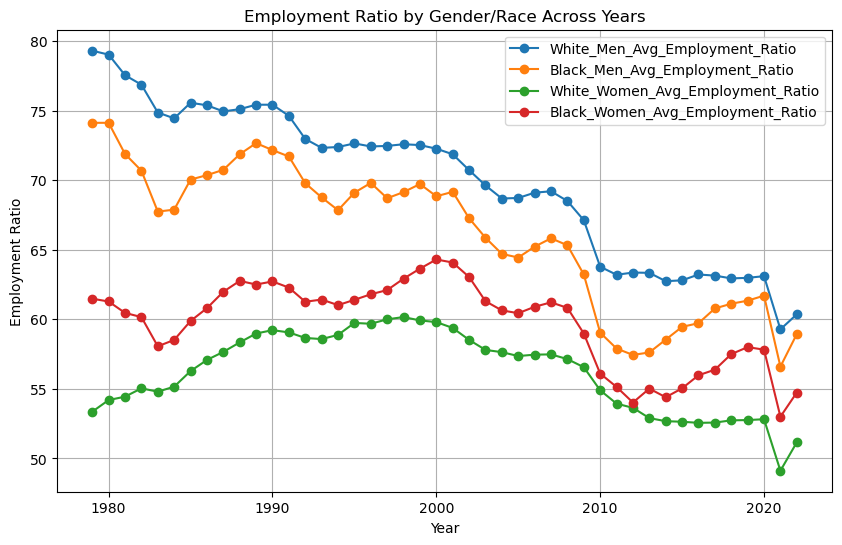

In [423]:
plt.figure(figsize=(10, 6))
for col in ['White_Men_Avg_Employment_Ratio', 'Black_Men_Avg_Employment_Ratio', 'White_Women_Avg_Employment_Ratio', 'Black_Women_Avg_Employment_Ratio']:
    plt.plot(avg_employment_ratio_df['year'], avg_employment_ratio_df[col], marker='o', label=col)

plt.title("Employment Ratio by Gender/Race Across Years")
plt.xlabel("Year")
plt.ylabel("Employment Ratio")
plt.legend()
plt.grid(True)
plt.savefig('employment_ratio_across__each_year', bbox_inches='tight')
plt.show()

In [425]:
# Step 1: Calculate Wage Gaps (Absolute and Percentage)
avg_employment_ratio_df['White_Men_vs_Black_Men_Gap'] = abs(avg_employment_ratio_df['White_Men_Avg_Employment_Ratio'] - avg_employment_ratio_df['Black_Men_Avg_Employment_Ratio'])
avg_employment_ratio_df['White_Women_vs_Black_Women_Gap'] = abs(avg_employment_ratio_df['White_Women_Avg_Employment_Ratio'] - avg_employment_ratio_df['Black_Women_Avg_Employment_Ratio'])

avg_employment_ratio_df['White_Men_vs_White_Women_Gap'] = abs(avg_employment_ratio_df['White_Men_Avg_Employment_Ratio'] - avg_employment_ratio_df['White_Women_Avg_Employment_Ratio'])
avg_employment_ratio_df['Black_Men_vs_Black_Women_Gap'] = abs(avg_employment_ratio_df['Black_Men_Avg_Employment_Ratio'] - avg_employment_ratio_df['Black_Women_Avg_Employment_Ratio'])

# Percentage Difference
avg_employment_ratio_df['White_Men_vs_Black_Men_Gap_Percent'] = (
    avg_employment_ratio_df['White_Men_vs_Black_Men_Gap'] / ((avg_employment_ratio_df['White_Men_Avg_Employment_Ratio'] + avg_employment_ratio_df['Black_Men_Avg_Employment_Ratio']) / 2) 
) * 100

avg_employment_ratio_df['White_Women_vs_Black_Women_Gap_Percent'] = (
    avg_employment_ratio_df['White_Women_vs_Black_Women_Gap'] / ((avg_employment_ratio_df['White_Women_Avg_Employment_Ratio'] + avg_employment_ratio_df['Black_Women_Avg_Employment_Ratio']) / 2) 
) * 100

avg_employment_ratio_df['White_Men_vs_White_Women_Gap_Percent'] = (
    avg_employment_ratio_df['White_Men_vs_White_Women_Gap'] / ((avg_employment_ratio_df['White_Men_Avg_Employment_Ratio'] + avg_employment_ratio_df['White_Women_Avg_Employment_Ratio']) / 2) 
) * 100

avg_employment_ratio_df['Black_Men_vs_Black_Women_Gap_Percent'] = (
    avg_employment_ratio_df['Black_Men_vs_Black_Women_Gap'] / ((avg_employment_ratio_df['Black_Men_Avg_Employment_Ratio'] + avg_employment_ratio_df['Black_Women_Avg_Employment_Ratio']) / 2) 
) * 100

/var/folders/zw/z8nmwxs57w527cj0tp_9c_hw0000gn/T/ipykernel_48091/1793755899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_employment_ratio_df['White_Men_vs_Black_Men_Gap'] = abs(avg_employment_ratio_df['White_Men_Avg_Employment_Ratio'] - avg_employment_ratio_df['Black_Men_Avg_Employment_Ratio'])
/var/folders/zw/z8nmwxs57w527cj0tp_9c_hw0000gn/T/ipykernel_48091/1793755899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_employment_ratio_df['White_Women_vs_Black_Women_Gap'] = abs(avg_employmen

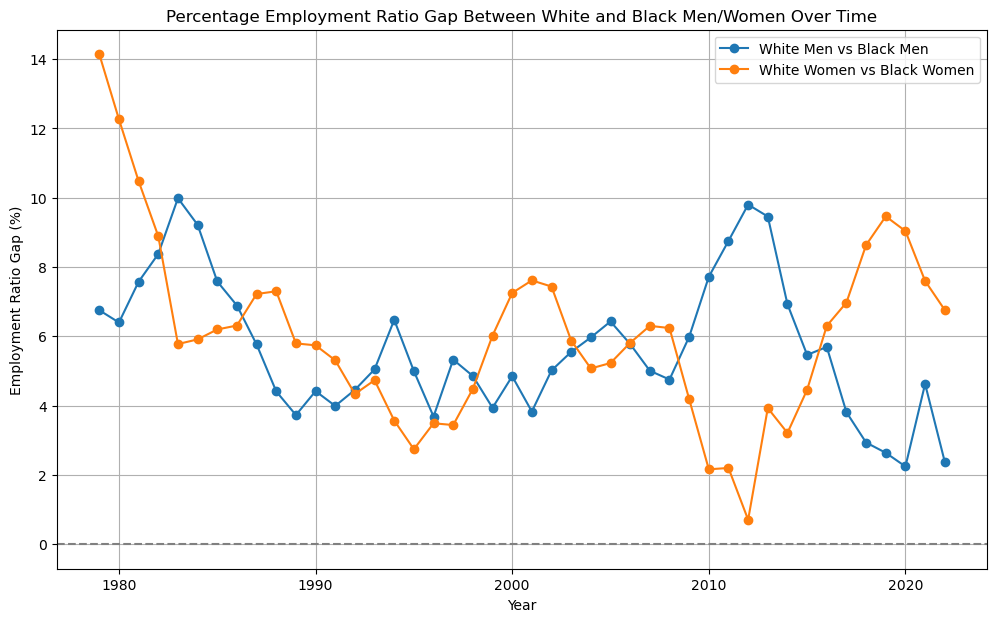

In [427]:
plt.figure(figsize=(12, 7))

# Plot Percentage Wage Gaps for Men and Women
plt.plot(avg_employment_ratio_df['year'], avg_employment_ratio_df['White_Men_vs_Black_Men_Gap_Percent'], marker='o', label='White Men vs Black Men')
plt.plot(avg_employment_ratio_df['year'], avg_employment_ratio_df['White_Women_vs_Black_Women_Gap_Percent'], marker='o', label='White Women vs Black Women')

# Customize Plot
plt.title("Percentage Employment Ratio Gap Between White and Black Men/Women Over Time")
plt.xlabel("Year")
plt.ylabel("Employment Ratio Gap (%)")
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0%
plt.legend()
plt.grid(True)

plt.show()

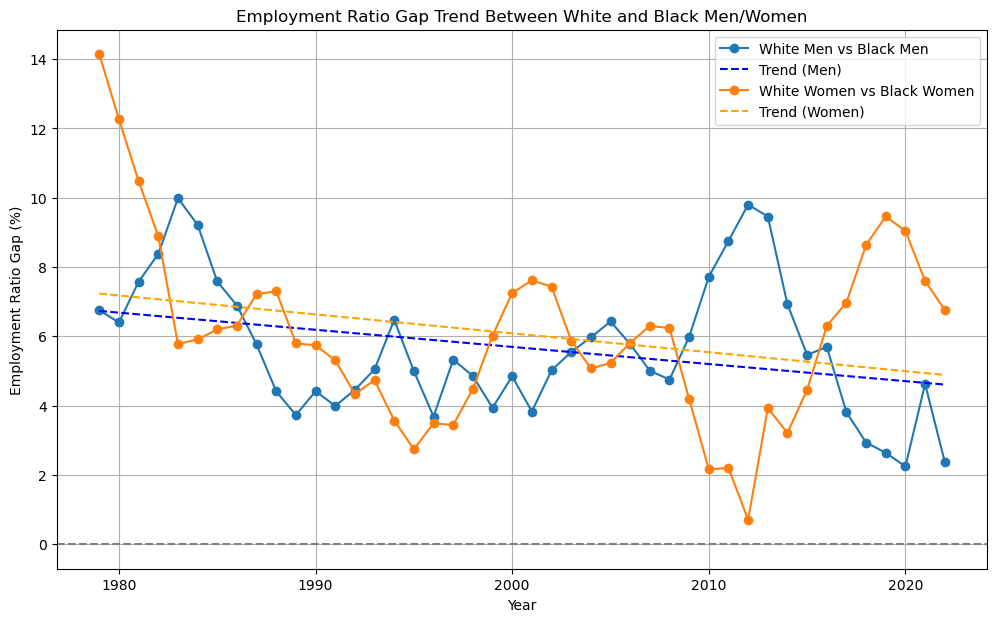

In [429]:
import numpy as np

# Fit Trendline to See Slope of Change
x = avg_employment_ratio_df['year']
y_men = avg_employment_ratio_df['White_Men_vs_Black_Men_Gap_Percent']
y_women = avg_employment_ratio_df['White_Women_vs_Black_Women_Gap_Percent']

z_men = np.polyfit(x, y_men, 1)
z_women = np.polyfit(x, y_women, 1)
p_men = np.poly1d(z_men)
p_women = np.poly1d(z_women)

# Plot with Trendlines
plt.figure(figsize=(12, 7))
plt.plot(x, y_men, marker='o', label='White Men vs Black Men')
plt.plot(x, p_men(x), linestyle='--', color='blue', label='Trend (Men)')
plt.plot(x, y_women, marker='o', label='White Women vs Black Women')
plt.plot(x, p_women(x), linestyle='--', color='orange', label='Trend (Women)')

plt.title("Employment Ratio Gap Trend Between White and Black Men/Women")
plt.xlabel("Year")
plt.ylabel("Employment Ratio Gap (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)

plt.show()


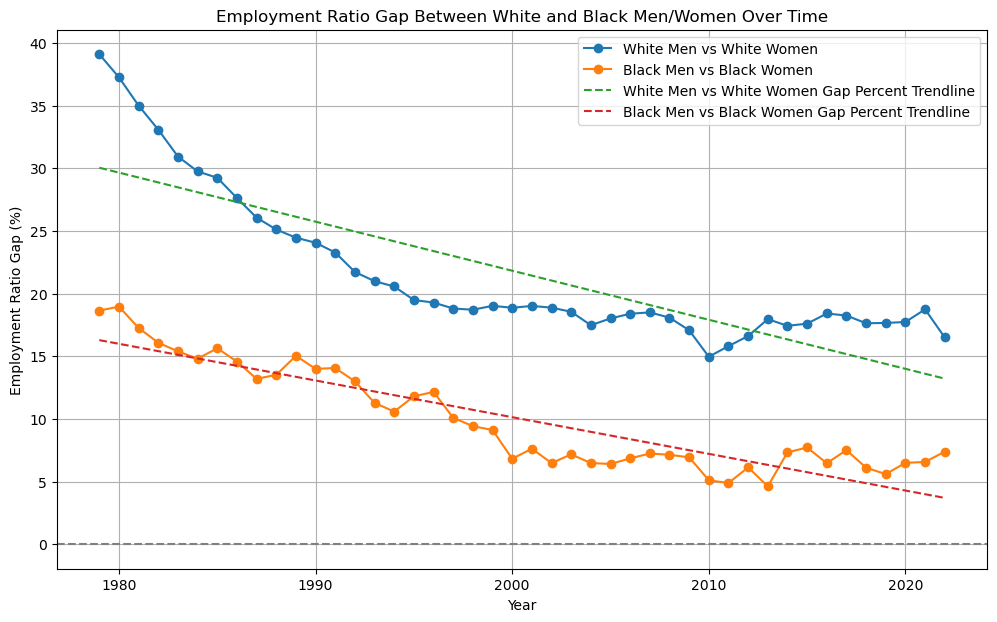

In [435]:
from scipy.stats import linregress
import numpy as np

plt.figure(figsize=(12, 7))

# Plot Percentage Wage Gaps for Men and Women
plt.plot(avg_wage_df['year'], avg_employment_ratio_df['White_Men_vs_White_Women_Gap_Percent'], marker='o', label='White Men vs White Women')
plt.plot(avg_wage_df['year'], avg_employment_ratio_df['Black_Men_vs_Black_Women_Gap_Percent'], marker='o', label='Black Men vs Black Women')

# Calculate and plot trend lines
for column in ['White_Men_vs_White_Women_Gap_Percent', 'Black_Men_vs_Black_Women_Gap_Percent']:
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(avg_wage_df['year'], avg_employment_ratio_df[column])
    
    # Generate trend line values
    trend_line = intercept + slope * avg_wage_df['year']
    
    # Plot trend line
    plt.plot(avg_wage_df['year'], trend_line, linestyle='--', label=f"{column.replace('_', ' ')} Trendline")

# Customize Plot
plt.title("Employment Ratio Gap Between White and Black Men/Women Over Time")
plt.xlabel("Year")
plt.ylabel("Employment Ratio Gap (%)")
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0%
plt.legend()
plt.grid(True)
plt.savefig('percentage_employment_ratio_gap', bbox_inches='tight')
plt.show()

In [433]:
wage_vs_employment_df = data[["year","White_Men_Avg_Wage","White_Men_Avg_Employment_Ratio", "Black_Men_Avg_Wage", "Black_Men_Avg_Employment_Ratio"]]
wage_vs_employment_df

,year,White_Men_Avg_Wage,White_Men_Avg_Employment_Ratio,Black_Men_Avg_Wage,Black_Men_Avg_Employment_Ratio
43,1979,30.376,79.30,26.318,74.12
42,1980,29.716,79.02,26.142,74.12
41,1981,29.528,77.54,25.024,71.88
40,1982,29.780,76.86,24.710,70.68
39,1983,29.728,74.86,25.432,67.74
38,1984,29.938,74.44,25.208,67.88
37,1985,30.468,75.56,25.308,70.04
36,1986,31.346,75.38,25.668,70.36
35,1987,31.576,74.94,25.912,70.74
34,1988,31.756,75.10,26.576,71.86


In [499]:
def plot_employment_vs_wage_comparison(df, wage_str, employment_str, gender_white, gender_black, title_str):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
    
    # Scatter Plot
    sns.scatterplot(
        x=df[f'{gender_white}_{wage_str}'],
        y=df[f'{gender_white}_{employment_str}'],
        label='White Men',
        ax=axes[0]
    )
    sns.scatterplot(
        x=df[f'{gender_black}_{wage_str}'],
        y=df[f'{gender_black}_{employment_str}'],
        label='Black Men',
        ax=axes[0]
    )
    axes[0].set_title(f'Employment-Ratio vs Wage Among {title_str}')
    axes[0].set_xlabel('Hourly Wage (in USD)')
    axes[0].set_ylabel('Employment Ratio')
    axes[0].legend([gender_white,gender_black])
    axes[0].grid(True)
    
    # Line Plot
    axes[1].plot(df['year'], df[f'{gender_white}_{wage_str}'], marker='o', label=f'{gender_white} Wage')
    axes[1].plot(df['year'], df[f'{gender_black}_{wage_str}'], marker='o', label=f'{gender_black} Wage')
    axes[1].plot(df['year'], df[f'{gender_white}_{employment_str}'], marker='s', linestyle='--', label=f'{gender_white} Employment Ratio')
    axes[1].plot(df['year'], df[f'{gender_black}_{employment_str}'], marker='s', linestyle='--', label=f'{gender_black} Employment Ratio')
    axes[1].set_title(f'Employment-Ratio vs Wage Over Years between {title_str}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f'{gender_white} vs {gender_black}', bbox_inches='tight')
    plt.show()


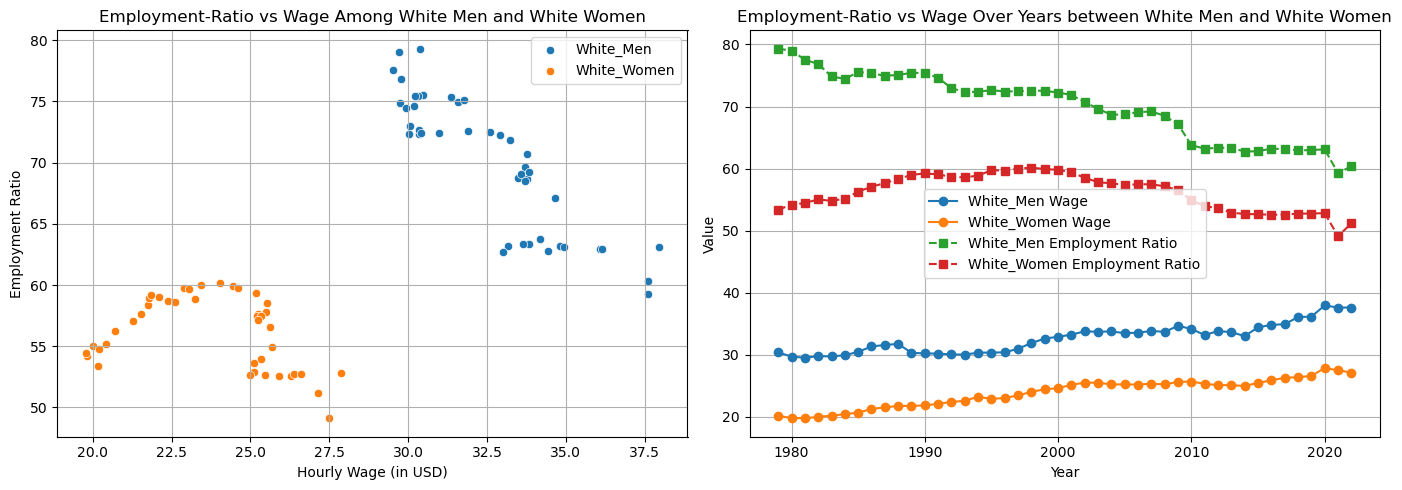

In [501]:
gender_white1 = "White_Men"
gender_white2= "White_Women"
wage_str = "Avg_Wage"
employment_str = "Avg_Employment_Ratio"
title_str = "White Men and White Women"

plot_employment_vs_wage_comparison(data, wage_str, employment_str, gender_white1, gender_white2, title_str)
#line_plot_employment_vs_wage_men(data, wage_str, employment_str, gender_white, gender_black, title_str)

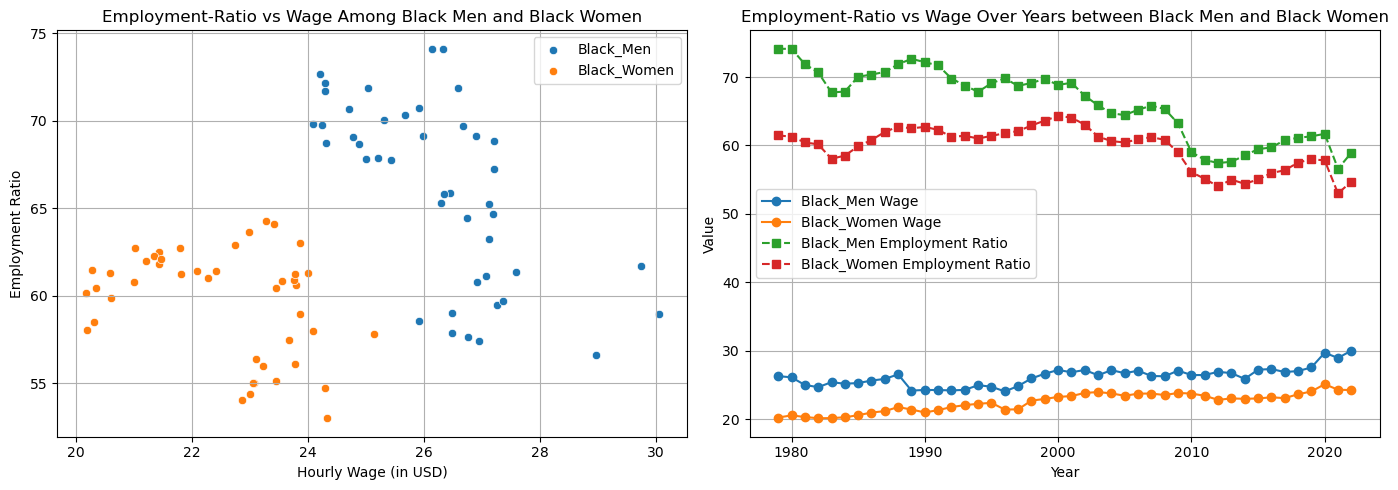

In [503]:
gender_black1 = "Black_Men"
gender_black2= "Black_Women"
wage_str = "Avg_Wage"
employment_str = "Avg_Employment_Ratio"
title_str = "Black Men and Black Women"

plot_employment_vs_wage_comparison(data, wage_str, employment_str, gender_black1, gender_black2, title_str)
#line_plot_employment_vs_wage_men(data, wage_str, employment_str, gender_white, gender_black, title_str)

In [509]:
def correlation_heatmap(df, education_col=[], employment_col=[]):
    selected_cols = [
        "White_Men_Avg_Wage", "Black_Men_Avg_Wage", "White_Women_Avg_Wage", "Black_Women_Avg_Wage",
        "White_Men_Avg_Employment_Ratio", "Black_Men_Avg_Employment_Ratio", "White_Women_Avg_Employment_Ratio", "Black_Women_Avg_Employment_Ratio"
    ]
    corr = df[selected_cols].corr()
    mask = corr.apply(lambda x: x.index.str.contains('_Wage') != x.name.endswith('_Wage'))
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr.where(mask), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Wages and Employment Ratios')
    plt.savefig('correlation matrix', bbox_inches='tight')
    plt.show()

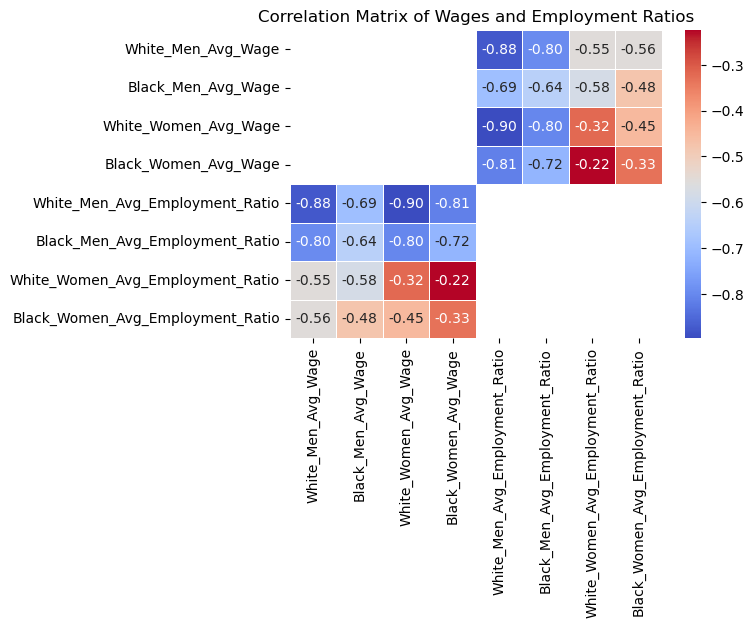

In [511]:
correlation_heatmap(data)